# “What is the probability of landing on Boardwalk within the first 10 turns, given that the player lands on a property in the first turn?”
# The sample space is the set of all possible sequences of dice rolls and resulting board positions over 10 turns. Each turn’s position can be any of the 40 spaces on the board. One trial would consist of trial is simulated game of 10 turns for a single player.

In [7]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Conditional probability: 0.1034 (6/58)


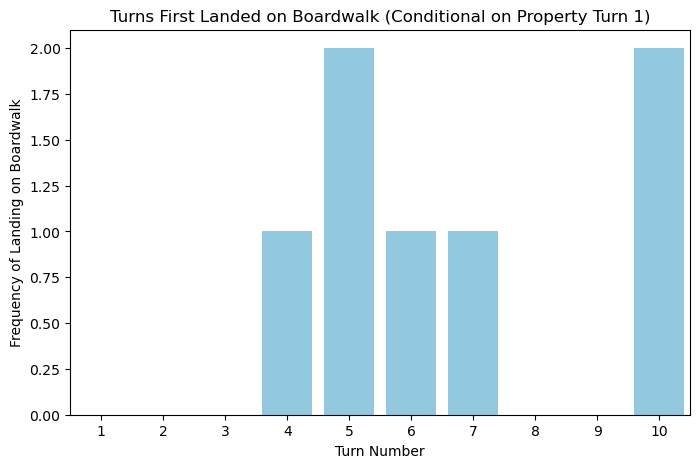

In [9]:
BOARD_SIZE = 40
BOARDWALK = 39
PROPERTY_POSITIONS = [1,3,5,6,8,9,11,12,13,14,15,16,18,19,21,23,24,25,26,27,28,29,31,32,34,35,37,39]
TURNS = 10
TRIALS = 100

# Simulation
turns_hit_boardwalk = []
property_turn1_count = 0
successes = 0

for _ in range(TRIALS):
    position = 0
    landed_on_property_turn1 = False
    boardwalk_hit = False
    
    for turn in range(1, TURNS + 1):
        roll = random.randint(1,6) + random.randint(1,6)
        position = (position + roll) % BOARD_SIZE
        
        if turn == 1 and position in PROPERTY_POSITIONS:
            landed_on_property_turn1 = True
        
        if position == BOARDWALK:
            boardwalk_hit = True
            if landed_on_property_turn1:
                turns_hit_boardwalk.append(turn)
    
    # Count for conditional probability
    if landed_on_property_turn1:
        property_turn1_count += 1
        if boardwalk_hit:
            successes += 1

# Conditional probability
if property_turn1_count > 0:
    conditional_prob = successes / property_turn1_count
else:
    conditional_prob = 0

print(f"Conditional probability: {conditional_prob:.4f} ({successes}/{property_turn1_count})")

# Bar chart of which turn Boardwalk was first landed on
if turns_hit_boardwalk:
    df = pd.DataFrame(turns_hit_boardwalk, columns=["Turn"])
    plt.figure(figsize=(8,5))
    sns.countplot(x="Turn", data=df, color="skyblue", order=range(1, TURNS+1))
    plt.xlabel("Turn Number")
    plt.ylabel("Frequency of Landing on Boardwalk")
    plt.title("Turns First Landed on Boardwalk (Conditional on Property Turn 1)")
    plt.show()
else:
    print("No Boardwalk hits in trials where turn 1 was a property.")